In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Checkpoint 1
- Tìm bảng dữ liệu trên mạng, vẽ DataFrame tương ứng
- Nguồn : [Climate Change and Energy - Energy Consumption Per Dollar GDP (% Improvement From 2005 Levels)](https://data.gov.sg/dataset/climate-change-and-energy-energy-consumption-per-dollar-gdp-improvement-from-2005-levels?view_id=1d25a7bc-5b44-4cec-adbb-59ac66c2359f&resource_id=45e7f290-a25b-468e-9692-6dc14297734d)

In [2]:
data={
    'Year':[2007,2008,2009,2010,2011,2012,2013],
    'Energy Consumption Per Dollar GDP (%)':[11.3,12.2,15.4,17.1,17.1,22.3,25.6]
}
df=pd.DataFrame(
    data,
    columns=['Year','Energy Consumption Per Dollar GDP (%)'],
    index=range(1,8)
)
df

,Year,Energy Consumption Per Dollar GDP (%)
1,2007,11.3
2,2008,12.2
3,2009,15.4
4,2010,17.1
5,2011,17.1
6,2012,22.3
7,2013,25.6


# Checkpoint 2
- Những con số thu được dưới cột Energy Consumption Per Dollar GDP (%), hàng 25%, 50%, 75% trong đầu ra của df.describe() ở trên là từ đâu ra?

In [3]:
df.describe()

,Year,Energy Consumption Per Dollar GDP (%)
count,7.000000,7.000000
mean,2010.000000,17.285714
std,2.160247,5.157334
min,2007.000000,11.300000
25%,2008.500000,13.800000
50%,2010.000000,17.100000
75%,2011.500000,19.700000
max,2013.000000,25.600000


## Trong tập các giá trị trong cột Energy Consumption Per Dollar GDP (%) :
- Có tối đa 25% phần tử nhỏ hơn hoặc bằng 13.800000
- Có tối đa 50% phần tử nhỏ hơn hoặc bằng 17.100000
- Có tối đa 75% phần tử nhỏ hơn hoặc bằng 19.700000

# Checkpoint 3 : Sử dụng biểu đồ lượng mưa đã cho và thực hiện các yêu cầu

In [4]:
df=pd.read_csv('weather_in_Hanoi.csv')
df

,month,min_temperature (F),max_temperature (F),rainfall (mm),rainy_days
0,1,57,66,25,9
1,2,59,68,30,11
2,3,65,74,40,15
3,4,72,80,90,13
4,5,75,89,180,14
5,6,77,91,240,15
6,7,77,90,280,16
7,8,78,90,325,17
8,9,76,85,270,14
9,10,72,77,130,9


### Lấy dữ liệu lượng mưa (rainfall) và nhiệt độ cao nhất (max_temperature (F)) vào tháng 6 và tháng 7 tại Hà Nội - thời điểm diễn ra MaSSP 2018!


In [5]:
df[['rainfall (mm)','max_temperature (F)']]

,rainfall (mm),max_temperature (F)
0,25,66
1,30,68
2,40,74
3,90,80
4,180,89
5,240,91
6,280,90
7,325,90
8,270,85
9,130,77


### Những tháng nào có nhiệt dộ thấp nhất (min_temperature (F)) bằng 77?


In [6]:
df[df['min_temperature (F)']==77]

,month,min_temperature (F),max_temperature (F),rainfall (mm),rainy_days
5,6,77,91,240,15
6,7,77,90,280,16


### Chỉ ra 3 tháng có số ngày mưa lớn nhất.

In [7]:
df.nlargest(3,'rainy_days')

,month,min_temperature (F),max_temperature (F),rainfall (mm),rainy_days
7,8,78,90,325,17
6,7,77,90,280,16
2,3,65,74,40,15


# Check point 4

In [8]:
df=pd.read_csv('cs_applications.csv')
df

,Thí sinh,Điểm phẩy môn Toán,Điểm phẩy môn Tin,Cần hỗ trợ kí túc xá
1,A,9.1,NaN,Không
2,B,8.7,9.5,Có
3,C,7.9,NaN,NaN
4,D,8.2,8.5,NaN
5,E,NaN,NaN,Không


In [9]:
df.fillna({"Điểm phẩy môn Toán":0.0,
           "Điểm phẩy môn Tin":0.0},inplace=True)

,Thí sinh,Điểm phẩy môn Toán,Điểm phẩy môn Tin,Cần hỗ trợ kí túc xá
1,A,9.1,0.0,Không
2,B,8.7,9.5,Có
3,C,7.9,0.0,NaN
4,D,8.2,8.5,NaN
5,E,0.0,0.0,Không


Hãy chuyển đổi các giá trị `NaN` trong cột "Cần hỗ trợ kí túc xá" thành "Không". Lần này, hãy thử hàm `fillna` khi _không_ cung cấp `inplace=True` trước, và so sánh với giá trị của `df` khi cung cấp `inplace=True`.

In [10]:
df.fillna({"Cần hỗ trợ kí túc xá":"Không"},inplace=True)

,Thí sinh,Điểm phẩy môn Toán,Điểm phẩy môn Tin,Cần hỗ trợ kí túc xá
1,A,9.1,0.0,Không
2,B,8.7,9.5,Có
3,C,7.9,0.0,Không
4,D,8.2,8.5,Không
5,E,0.0,0.0,Không


- => Thiếu 'inplace=true' thì bảng giá trị không đổi sau thao tác

# Checkpoint 5 
Hãy thêm vào các cột 'min_temperature (C)' và 'rainfall (cm)'. Cuối cùng, bạn hãy tạo một DataFrame mới `df2`, chỉ chứa các cột `'month', 'max_temperature (C)', 'min_temperature (C)', 'rainfall (cm)', 'rainy_days'` từ `df`. Chúng ta sẽ dùng `df2` cho phần Minh hoạ dữ liệu!

In [16]:
df=pd.read_csv('weather_in_Hanoi.csv')
df.index=range(1,13) 
df['max_temperature (C)']=(df['max_temperature (F)']-32)/1.80
df['min_temperature (C)']=(df['min_temperature (F)']-32)/1.80
df['rainfall (cm)']=df['rainfall (mm)']/10
df2=df[['month','max_temperature (C)', 'min_temperature (C)', 'rainfall (cm)', 'rainy_days']]


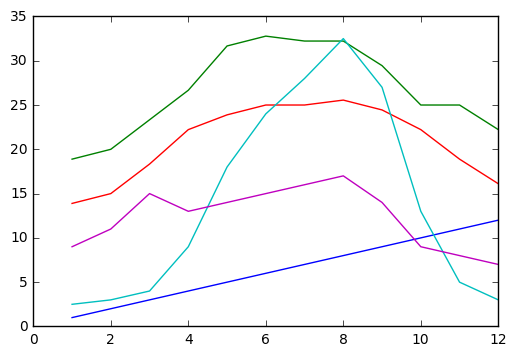

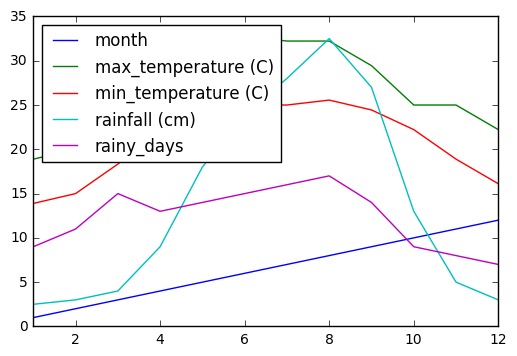

In [17]:
# Dùng matplotlib
plt.plot(df2)
plt.show()
# Dùng pandas 
df2.plot()
plt.show()

# Checkpoint 6
 - Hãy thử vẽ một số đồ thị tuỳ thích dựa theo những số liệu có thật, có ý nghĩa với bản thân bạn, và chia sẻ lên group Facebook để mọi người cùng biết nhé!

In [29]:
#Biểu đồ số lượng người chết do AIDS
df=pd.DataFrame()
df['Cả nước']=[2296,2146,2130,2131,2123]
df['Hà Nội']=[8,117,61,55,279]
df['Hải Phòng']=[30,17,12,55,367]
df['TP.Hồ Chí Minh']=[295,96,180,342,560]
df.index=range(2013,2018)
df

,Cả nước,Hà Nội,Hải Phòng,TP.Hồ Chí Minh
2013,2296,8,30,295
2014,2146,117,17,96
2015,2130,61,12,180
2016,2131,55,55,342
2017,2123,279,367,560


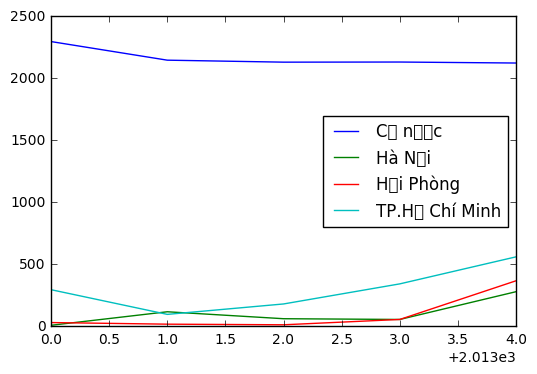

In [30]:
df.plot() 
plt.show()